# 🧪 Data Engineering Workflow - By Lenin Zapata

This notebook demonstrates a data engineering workflow: data loading, cleaning, transformation, and visualization.

In [1]:
# 📥 Loading data from a CSV file
import pandas as pd

df = pd.read_csv('datos.csv')
df.head()

,id,age,gender,department,salary,tenure_years,performance_score,left_company
0,1,56,Female,Marketing,53897.0,9.4,3.0,1
1,2,46,Female,HR,98148.0,9.0,3.0,1
2,3,32,Female,Marketing,53483.0,6.2,1.0,0
3,4,60,Male,Marketing,NaN,9.3,3.0,0
4,5,25,Male,Sales,47159.0,1.3,3.0,0


## 🧹 Data Cleaning
- Review of missing values
- Data type conversion

In [2]:
# Verificar valores nulos
df.isnull().sum()

id                   0
age                  0
gender               1
department           1
salary               1
tenure_years         0
performance_score    1
left_company         0
dtype: int64

In [3]:
# Remove rows with missing values
df_clean = df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 16 non-null     int64  
 1   age                16 non-null     int64  
 2   gender             16 non-null     object 
 3   department         16 non-null     object 
 4   salary             16 non-null     float64
 5   tenure_years       16 non-null     float64
 6   performance_score  16 non-null     float64
 7   left_company       16 non-null     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.1+ KB


## 🔄 Transform data
- Create new columns
- Apply filters

In [4]:
# Create a new example column
df_clean['nueva_columna'] = df_clean.select_dtypes(include='number').sum(axis=1)
df_clean.head()

/tmp/ipykernel_5964/3070522749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['nueva_columna'] = df_clean.select_dtypes(include='number').sum(axis=1)


,id,age,gender,department,salary,tenure_years,performance_score,left_company,nueva_columna
0,1,56,Female,Marketing,53897.0,9.4,3.0,1,53967.4
1,2,46,Female,HR,98148.0,9.0,3.0,1,98209.0
2,3,32,Female,Marketing,53483.0,6.2,1.0,0,53525.2
4,5,25,Male,Sales,47159.0,1.3,3.0,0,47193.3
5,6,38,Female,HR,110077.0,2.4,1.0,0,110124.4


In [5]:
# Filter data (e.g., values greater than a certain threshold)
df_filtrado = df_clean[df_clean['nueva_columna'] > 100]
df_filtrado.head()

,id,age,gender,department,salary,tenure_years,performance_score,left_company,nueva_columna
0,1,56,Female,Marketing,53897.0,9.4,3.0,1,53967.4
1,2,46,Female,HR,98148.0,9.0,3.0,1,98209.0
2,3,32,Female,Marketing,53483.0,6.2,1.0,0,53525.2
4,5,25,Male,Sales,47159.0,1.3,3.0,0,47193.3
5,6,38,Female,HR,110077.0,2.4,1.0,0,110124.4


## 📊 Data Visualization
- Histograms
- Scatter plots

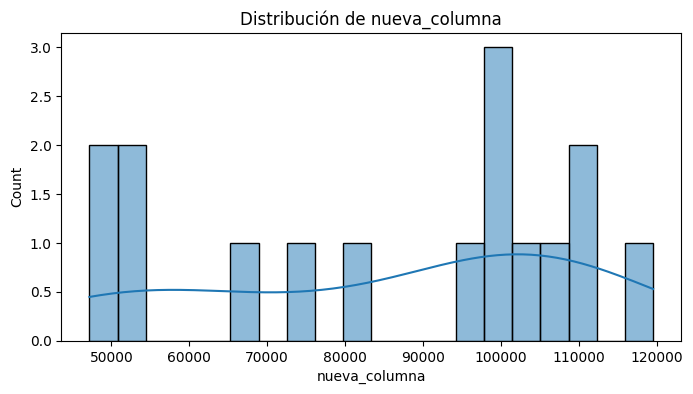

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['nueva_columna'], bins=20, kde=True)
plt.title('Distribution of new column')
plt.show()

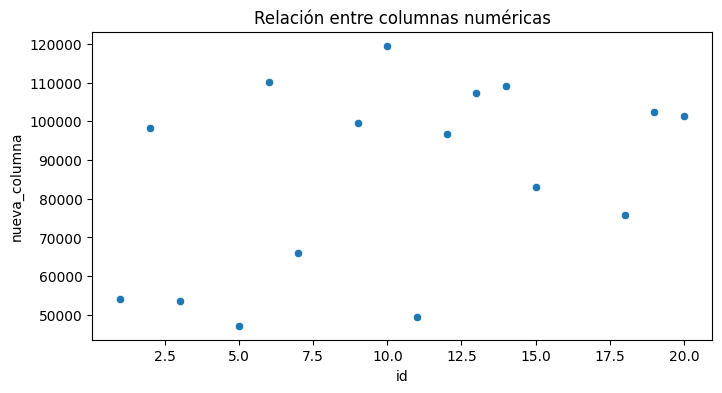

In [7]:
# Scatter plot between two numerical columns
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_clean, x=df_clean.select_dtypes(include='number').columns[0], y='nueva_columna')
plt.title('Relationship between numerical columns')
plt.show()